In [32]:

import pandas as pd
import numpy as nu
import datetime as datatoday
import unidecode as unidecode
from unidecode import unidecode

A base de dados selecionada é composta pelas Carteiras de Trabalho e Previdência Social (CTPS) emitidas no país em 2020. Essas carteiras contêm informações sobre as vias de emissão, datas de emissão, localidades e dados dos solicitantes, como idade, localidade, escolaridade, raça, estado civil e tipo de cidadania.

Com base nesses dados, é possível analisar diversos aspectos relacionados à força de trabalho durante esse período. Além disso, podemos investigar relações entre raça, sexo e outros fatores relevantes. Essa análise pode fornecer insights valiosos para políticas públicas, estratégias de emprego e igualdade de oportunidades.


In [2]:
df=pd.read_csv('basectps.csv',delimiter=";")
display(df)

,Tipo Protocolo,Nome Município Órgão,Sigla UF Órgão,Data Emissão,Sexo,Nível Escolaridade,Raça e Cor,Estado Civil,Data Nascimento,Tipo Cidadania,Nome Município Nascimento,Sigla UF Nascimento
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,Brasileiro Nato,ALTOS,PI
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,Brasileiro Nato,GONCALVES DIAS,MA
2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,23/03/1975,Brasileiro Nato,MARABA,PA
3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,04/09/1986,Brasileiro Nato,CONDEUBA,BA
4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO J,21/10/1984,Brasileiro Nato,BETIM,MG
...,...,...,...,...,...,...,...,...,...,...,...,...
463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,07/01/2003,Brasileiro Nato,MARTINOPOLIS,SP
463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,28/01/2002,Brasileiro Nato,MARTINOPOLIS,SP
463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,07/11/2001,Brasileiro Nato,MARTINOPOLIS,SP
463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,20/12/1987,Brasileiro Nato,LAGES,SC


In [10]:
colunas = ["Tipo Protocolo", "Nome Município Órgão", "Sigla UF Órgão", "Data Emissão", "Sexo", "Nível Escolaridade", "Raça e Cor", "Estado Civil", "Data Nascimento", "Tipo Cidadania", "Nome Município Nascimento", "Sigla UF Nascimento"]

colunas_sem_acentos_espacos = [unidecode(coluna).replace(" ", "_").lower() for coluna in colunas]

display(colunas_sem_acentos_espacos)

['tipo_protocolo',
 'nome_municipio_orgao',
 'sigla_uf_orgao',
 'data_emissao',
 'sexo',
 'nivel_escolaridade',
 'raca_e_cor',
 'estado_civil',
 'data_nascimento',
 'tipo_cidadania',
 'nome_municipio_nascimento',
 'sigla_uf_nascimento']

In [11]:
display(df)

,tipo_protocolo,nome_município_órgão,sigla_uf_órgão,data_emissão,sexo,nível_escolaridade,raça_e_cor,estado_civil,data_nascimento,tipo_cidadania,municipio_nascimento,uf_nascimento
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,Brasileiro Nato,ALTOS,PI
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,Brasileiro Nato,GONCALVES DIAS,MA
2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,23/03/1975,Brasileiro Nato,MARABA,PA
3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,04/09/1986,Brasileiro Nato,CONDEUBA,BA
4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO J,21/10/1984,Brasileiro Nato,BETIM,MG
...,...,...,...,...,...,...,...,...,...,...,...,...
463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,07/01/2003,Brasileiro Nato,MARTINOPOLIS,SP
463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,28/01/2002,Brasileiro Nato,MARTINOPOLIS,SP
463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,07/11/2001,Brasileiro Nato,MARTINOPOLIS,SP
463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,20/12/1987,Brasileiro Nato,LAGES,SC


In [23]:
df = df.rename(columns={'nome_município_órgão': 'nome_municipio_orgao',
                        'sigla_uf_órgão': 'sigla_uf_orgao',
                        'data_emissão': 'data_emissao',
                        'nível_escolaridade':'nivel_escolaridade',
                        'raça_e_cor':'raca_e_cor'})

In [19]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [26]:
df.columns = df.columns.str.replace('\t', '')

In [27]:
#tem conteúdo vazio, vamos dropar:
df = df.dropna()
display(df)

,tipo_protocolo,nome_municipio_orgao,sigla_uf_orgao,data_emissao,sexo,nivel_escolaridade,raca_e_cor,estado_civil,data_nascimento,tipo_cidadania,municipio_nascimento,uf_nascimento,escolaridade_condensada
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,Brasileiro Nato,ALTOS,PI,Superior Completo
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,Brasileiro Nato,GONCALVES DIAS,MA,Ensino Médio Incompleto
2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,23/03/1975,Brasileiro Nato,MARABA,PA,Ensino Médio Completo
3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,04/09/1986,Brasileiro Nato,CONDEUBA,BA,Ensino Médio Completo
4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO J,21/10/1984,Brasileiro Nato,BETIM,MG,Ensino Médio Completo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,07/01/2003,Brasileiro Nato,MARTINOPOLIS,SP,Ensino Médio Completo
463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,28/01/2002,Brasileiro Nato,MARTINOPOLIS,SP,Ensino Médio Completo
463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,07/11/2001,Brasileiro Nato,MARTINOPOLIS,SP,Ensino Médio Completo
463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,20/12/1987,Brasileiro Nato,LAGES,SC,Ensino Médio Completo


In [29]:
#Vamos condensar o nível de escolaridade para facilitar nas análises:
escolaridade_condensada = {
    "1º GRAU COMPLETO ATÉ 8ª SÉRIE COMP.": "Fundamental Completo",
    "1º GRAU INCOMP. 5ª A 8ª SÉRIE INCOMP.": "Fundamental Incompleto",
    "1º GRAU INCOMP. ATÉ A 4ª SÉRIE INCOMP.": "Fundamental Incompleto",
    "1º GRAU INCOMPLETO ATÉ A 4ª SÉRIE COMP.": "Fundamental Incompleto",
    "2º GRAU COMPLETO OU TEC. PROFISSIONAL": "Ensino Médio Completo",
    "2º GRAU INCOMPLETO": "Ensino Médio Incompleto",
    "ALFABETIZADO SEM CURSOS REGULARES": "Alfabetizado",
    "ANALFABETO": "Analfabeto",
    "APERFEICOAMENTO": "Aperfeiçoamento",
    "DOUTORADO": "Doutorado",
    "ESPECIALIZACAO": "Especialização",
    "LIVRE DOCENCIA": "Livre Docência",
    "MESTRADO": "Mestrado",
    "PHD": "Doutorado",
    "POS DOCTOR": "Pós-Doutorado",
    "POS GRADUACAO": "Pós-Graduação",
    "SEMIANALFABETO": "Semianalfabeto",
    "SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.": "Superior Completo",
    "SUPERIOR INCOMPLETO": "Superior Incompleto",
}


df["escolaridade_condensada"] = df["nivel_escolaridade"].apply(lambda x: escolaridade_condensada[x])

df.to_csv("basectps.csv")
display(df)

,tipo_protocolo,nome_municipio_orgao,sigla_uf_orgao,data_emissao,sexo,nivel_escolaridade,raca_e_cor,estado_civil,data_nascimento,tipo_cidadania,municipio_nascimento,uf_nascimento,escolaridade_condensada
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,Brasileiro Nato,ALTOS,PI,Superior Completo
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,Brasileiro Nato,GONCALVES DIAS,MA,Ensino Médio Incompleto
2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,23/03/1975,Brasileiro Nato,MARABA,PA,Ensino Médio Completo
3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,04/09/1986,Brasileiro Nato,CONDEUBA,BA,Ensino Médio Completo
4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO J,21/10/1984,Brasileiro Nato,BETIM,MG,Ensino Médio Completo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,07/01/2003,Brasileiro Nato,MARTINOPOLIS,SP,Ensino Médio Completo
463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,28/01/2002,Brasileiro Nato,MARTINOPOLIS,SP,Ensino Médio Completo
463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,07/11/2001,Brasileiro Nato,MARTINOPOLIS,SP,Ensino Médio Completo
463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,20/12/1987,Brasileiro Nato,LAGES,SC,Ensino Médio Completo


In [37]:
from datetime import date

In [38]:
data_nascimento = df['data_nascimento']
hoje = date.today()
idade = hoje.year - data_nascimento.dt.year

# Ajustar a idade para considerar meses e dias
for i in range(len(df)):
    if hoje.month < data_nascimento[i].month:
        idade[i] -= 1
    elif hoje.month == data_nascimento[i].month and hoje.day < data_nascimento[i].day:
        idade[i] -= 1
df['idade'] = idade
df.to_csv('basectps.csv')

Vamos ver a distribuição por idade, sexo e nível de escolaridade:

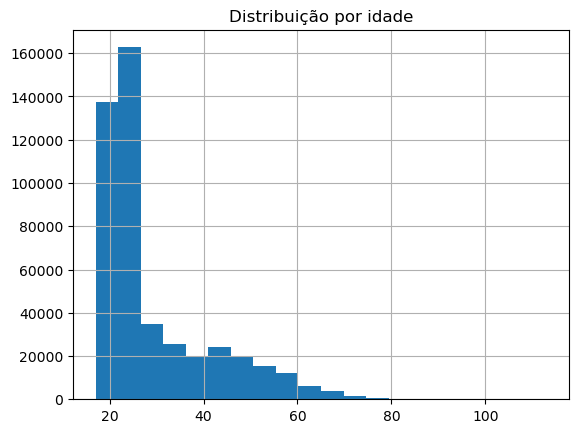

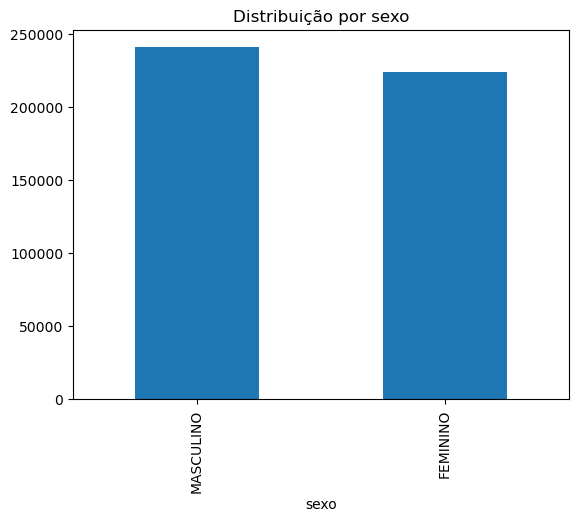

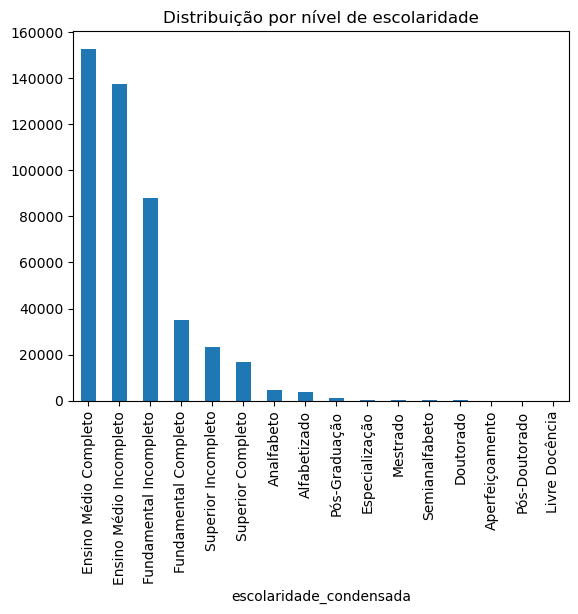

In [40]:
import matplotlib.pyplot as plt


df = pd.read_csv("basectps.csv")


df['idade'].hist(bins=20)
plt.title('Distribuição por idade')
plt.show()

df['sexo'].value_counts().plot.bar()
plt.title('Distribuição por sexo')
plt.show()


df['escolaridade_condensada'].value_counts().plot.bar()
plt.title('Distribuição por nível de escolaridade')
plt.show()

Vamos comparar as médias de idade  e nível de escolaridade:

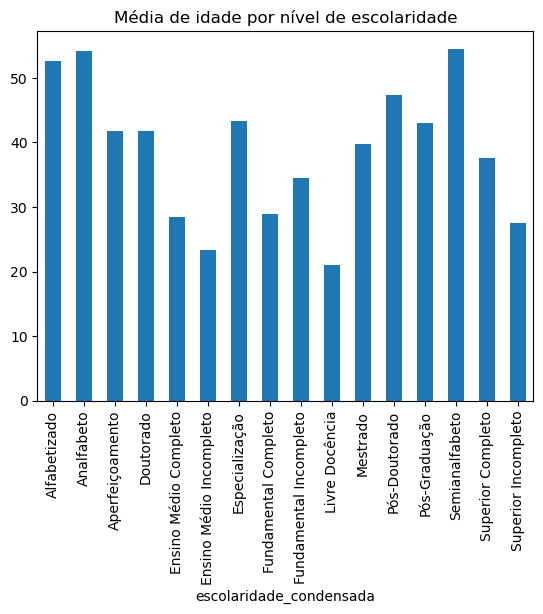

In [41]:

df.groupby('escolaridade_condensada')['idade'].mean().plot.bar()
plt.title('Média de idade por nível de escolaridade')
plt.show()